<font face="Times" size="7">
<b>
<i>
<center>Introduction To The Finite Element Method With Python: Part 2</center>
</i>
<font face="times new roman">
</font>
</b>
</font>

<font face="Times" size="5">
<b>

<center>J. F. Cardenas (2021)</center>
<center>Spectranova.net</center>    

<font face="times new roman">
</font>
</b>
</font>




# The Weighted Residual Integral Equation

The objective of this tutorial is to learn how to evaluate the weighted residual integral equation (WRIE) within the Galerkin approach, which imply that the weighting function is given by the approximate solution of the PDE. This requires that we express the weighting function in terms of the shape function (Introduction To Finite Element Method With Python:Part1, which will be refered as Part 1).

We will use the PDE which governs not only the deflection of a beam with an internal bending moment that is a linear function of position but also the heat flow through a composite wall when the surface temperature is known  (over a region 0 < x <H), i.e., equation 1.1 from part 1 (relabelled here as 2.1):

$
\begin{align}
D\frac {d^2 \phi}{d x^2}+ Q(x)=0
\label{eq1}\tag{2.1}
\end{align}
$

with the boundary conditions (surface or supporting end point conditions):

$$
\begin{align}
\phi(0) = \phi_0 \text{ and } \phi(H) = \phi_H
\end{align}
$$

The WRIE is preferably evaluated first around an internal node, as shown in figure 2.1 with node $s$ surrounded by the nodes $r$ and $t$. Subsequently, the contribution from the peripherial nodes will be mentioned at the end.

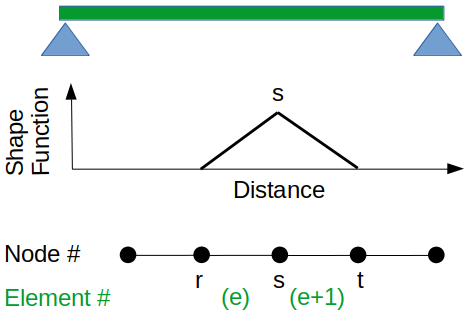

It should be emphasized that each node has TWO associated shape functions (see Part 1), e.g. ONE on each side of the $s$ node which corresponds to element (e) and (e+1), respectively (figure 2.1). Hence the WRIE is preferably separated in contributions from (e) and (e+1).

If equation $\ref{eq1}$ is inserted in the WRIE (becomes equation 1.5 in Part 1) and the contributions from elements (e) and (e+1) are separated, the following equation is :

$
\begin{align}
R_s^{(e)}+ R_s^{(e+1)} =-\int_{X_r}^{X_s}[N_s(D\frac {d^2 \phi}{d x^2}+Q)]^{(e)} dx - \int_{X_s}^{X_t}[N_s(D\frac {d^2 \phi}{d x^2}+Q)]^{(e+1)} dx
\label{eq2}\tag{2.2}
\end{align}$

<br>A lengthy derivation shows ([Segerlind](#6)) that one can rewrite   $\ref{eq2}$ as :</br>

$
\begin{align}
R_s^{(e)}+ R_s^{(e+1)} =-{\color{blue} {[D(\frac{d \phi}{d x})^{(e)}]_{x=X_s}}}+{\color{blue} {[D(\frac{d \phi}{d x})^{(e+1)}]_{x=X_s}}}
+\int_{X_r}^{X_s}[D\frac {d N_s}{d x}\frac {d \phi}{d x}-N_sQ]^{(e)} dx 
+\int_{X_s}^{X_t}[D\frac {d N_s}{d x}\frac {d \phi}{d x}-N_sQ]^{(e+1)} dx
\label{eq3}\tag{2.3}
\end{align}$


At this point it is worth highlighting the importance of the <span style='color:blue'>first two (interelement requirement) terms</span> on the right hand side:

* they constitute an interelement requirement, which cancel ONLY if the $\frac {d \phi}{d x}$ have the same value in element (e) and (e+1), i.e. on both sides of the s-node. This occurs only if the exact solution is a straight line. Hence in practice, the interelement terms can be seen as an error which tend to zero as the discretization becomes finer.

* they will not be incorporated into the systems of equations, unless explicitly said so.

* they can be used to evaluate the quality of the grid.

 
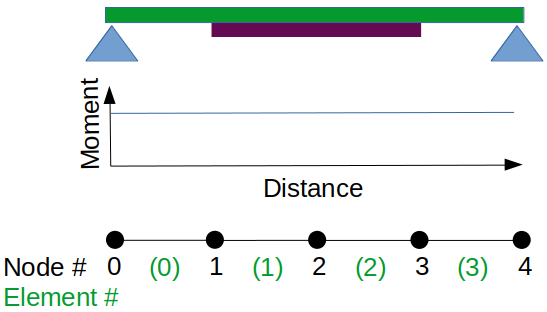

# The WRIE For A Supported Beam With Linearly Varying Moment
We will now calculate the approximate deflection ($\phi$) of a beam supported at both ends assuming the moment is linearly varying as a function of position as shown in the figure below. Neglecting the inter element requirement terms, equation 2.3 can be rewritten:
$
\begin{align}
R_s^{(e)}+ R_s^{(e+1)} =
+\int_{X_r}^{X_s}[D\frac {d N_s}{d x}\frac {d \phi}{d x}]^{(e)} dx 
-{\color{green}{\int_{X_r}^{X_s}[N_sQ]^{(e)} dx }} 
+\int_{X_s}^{X_t}[D\frac {d N_s}{d x}\frac {d \phi}{d x}]^{(e+1)} dx
-{\color{green}{\int_{X_s}^{X_t}[N_sQ]^{(e+1)} dx}}
=0
\label{eq4}\tag{2.4}
\end{align}$

Focusing on ${\color{green}{\text{the contribution from the moment to the WRIE}}}$ in $\ref{eq4}$ we have for the contribution from element (e):
$
\begin{align}
\int_{X_r}^{X_s}[N_sQ]^{(e)} dx =\int_{X_r}^{X_s}[(N_rQ_r+N_sQ_s)N_s]^{(e)} dx  
\label{eq5}\tag{2.5}
\end{align}$

where $Q_r$ and $Q_s$ are the moments at node $r$ and $s$, respectively. Inserting the expression for the shape functions, i.e. $N_r=\frac{X_s-x}{L}$, $N_s=\frac{x-X_r}{L}$ in $\ref{eq5}$ and evaluating:

$
\begin{align}
\int_{X_r}^{X_s}[N_sQ]^{(e)} dx = \frac{L(2Q_s+Q_r)}{6}  
\label{eq6}\tag{2.6}
\end{align}$

If we evaluate the moment contribution from element (e+1) in a similar way (note $N_s^{(e)} \neq N_s^{(e+1)}$):

$
\begin{align}
\int_{X_s}^{X_t}[N_sQ]^{(e+1)} dx =  \frac{L(2Q_s+Q_t)}{6} 
\label{eq7}\tag{2.7}
\end{align}
$

The complete evaluation of $\ref{eq4}$ requires that we turn our attention on the stiffness contribution <br>(given in [Segerlind](#6)):</br>

$
\begin{align}
\int_{X_r}^{X_s}[D\frac {d N_s}{d x}\frac {d \phi}{d x}]^{(e)} dx 
+\int_{X_s}^{X_t}[D\frac {d N_s}{d x}\frac {d \phi}{d x}]^{(e+1)} dx
=\frac {D}{L}|^{(e)}(-\phi_r+\phi_s)
+\frac {D}{L}|^{(e+1)}(\phi_s-\phi_t)
\label{eq8}\tag{2.8}
\end{align}$

Adding all terms ($\ref{eq6}\text{, } \ref{eq7}\text{ and } \ref{eq8}$) to the evaluation of the WRIE:

$
\begin{align} {\color{green}{\text{ ele & node index ->}}}
R_s^{(e)} + R_s^{(e+1)} =\frac {D}{L}|^{(e)}(-\phi_r+\phi_s)-\frac {L}{6}(Q_r+4Q_s+Q_t)
+\frac {D}{L}|^{(e+1)}(\phi_s-\phi_t)
\label{eq9}\tag{2.9}
\end{align}$


If we assume the element and node order number is sequential and have a direct correspondence with a physical sequential ordering<span style='color:Red'> (POSSIBLE ONLY WHEN PDEs HAVE ONE VARIABLE/DIMENSION) </span>, it is possible to write all quantities in terms of node index $s$:


$
\begin{align}{\color{green}{\text{node index ->}}}
R_s^{(e)} + R_s^{(e+1)} = R_s= -\frac {D}{L}|^{(s-1)}\phi_{(s-1)}+
[\frac {D}{L}|^{(s-1)}+\frac{D}{L}|^{(s)}]\phi_s-
\frac {D}{L}|^{(s)}\phi_{s+1}-\frac {L}{6}(Q_{s-1}+4Q_s+Q_{s+1})
\label{eq10}\tag{2.10}
\end{align}$



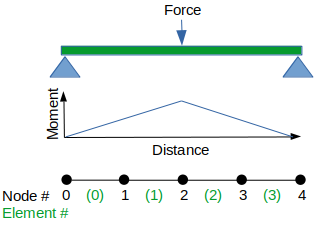

Evaluating $\ref{eq10}$ for node 1,2, and 3:

$
\begin{align}
R_1=-{\color{blue} {D^0\phi_0}}+(D^0+D^1)\phi_1-D^1\phi_2-\frac {L}{6}({\color{blue} {Q_0}}+4Q_1+Q_2)=0
\label{eq11}\tag{2.11}
\end{align}
$
$
\begin{align}
R_2=-D^1\phi_1+(D^1+D^2)\phi_2-D^2\phi_3-\frac {L}{6}(Q_1+4Q_2+Q_3)=0
\label{eq12}\tag{2.12}
\end{align}
$
$
\begin{align}
R_3=-D^2\phi_2+(D^2+D^3)\phi_3-{\color{blue} {D^3\phi_4}}+-\frac {L}{6}(Q_2+4Q_3+{\color{blue} {Q_4}})=0
\label{eq13}\tag{2.13}
\end{align}$

Note that all terms have been multiplied by $L$. By taking into account that there is NO deflection and moment for node <span style='color:blue'>ZERO and FOUR</span> (i.e. $\phi_0=0$, $\phi_4=0$, $Q_0=0$, $Q_4=0$) and placing the moment contribution to the WRIE on the right hand side we get:

$
\begin{align}
[D^{(0)}+D^{(1)}]\phi_1-D^{(1)}\phi_{2}=L^2 \frac {(4Q_1+Q_2)}{6}
\label{eq14}\tag{2.14}
\end{align}
$


$
\begin{align}
-D^{(1)}\phi_{(1)}+[D^{(1)}+D^{(2)}]\phi_3-D^{(2)}\phi_{3}=L^2 \frac {(Q_{1}+4Q_2+Q_{3})}{6}
\label{eq15}\tag{2.15}
\end{align}
$
$
\begin{align}
-D^{(2)}\phi_{(2)}+[D^{(2)}+D^{(3)}]\phi_4=L^2 \frac {(Q_{2}+4Q_3)}{6}
\label{eq16}\tag{2.16}
\end{align}
$

The left hand side of $\ref{eq14}-\ref{eq16}$ constitute a (stiffness) matrix and the right hand side a (force) vector. In the next cell we define the stiffness matrix and the force vector (please instantiate next code cell):

In [3]:
import numpy as np
from numpy.linalg import inv
Q_1 = 2*10**6
Q_2 = 4*10**6
Q_3 = 2*10**6
D   = 2*10**10
L   = 200
stiff_mat_lin = np.array([[2*D,-D,0],[-D,2*D,-D],[0,-D,2*D]])
force_lin = L**2*np.array([4*Q_1 + Q_2, Q_1 + 4*Q_2 + Q_3, Q_2 + 4*Q_3])/6


Finally to calculate the deflection, theoretically, one would write it as the product of the inverted matrix and the force vector. In python:`-inv(stiff_mat).dot(force)`.  However, this is an inefficient way to solve the problem for large systems of equations. Instead, 

In [4]:
#preferable way to use for large systems of equations
-(np.linalg.pinv(stiff_mat_lin)).dot(force_lin)

array([ -7.33333333, -10.66666667,  -7.33333333])

A final remark, 
* The evaluation of equation 2.3 changes if $D$ or $Q$ changes within the element.

* In addition, note that the equations for the end nodes never played a role in the problem, since deflection is zero there. Thus, we never explicitly bothered to formalize them.

# References
<a id =6>L. J. Segerlind, Applied Finite Element Analysis, 2nd Ed, Wiley, 1984.</a>